# Increasing Student Enrollment in STEM Majors
#### Lauren Phipps

***

## Overview <a id="Overview"></a>

STEM jobs are growing at rate double that of non-STEM jobs. With a majority of these jobs requiring a college degree, we need to ensure we have enough students pursuing STEM majors to be able to fill these roles. There are many factors that a student considers when deciding on a college major - what they are good at, what they are passionate about, what will lead to the best job, what their parents or mentors expect from them, and so on. With the Deparment of Education investing significant money into STEM education to meet the growing needs of a qualified workforce, it is important to isolate the factors of a student's high school experience that most impact their decision to pursue a STEM major in college. This project aimed to create a model that will determine these factors. Using a tuned logisitic regression model (F1 score of 0.52), I found that the most influential factors were: a student's gender (with male students being twice as likely to go into STEM), if a student is Asian, if a student expects to have a STEM career at 30, if a student sees themselves as a science person, and if they are taking a computer science class. Using this analysis, I recommend that the best way to invest is through more science class elective programs, career focused programs, and in diversifying representation in STEM through career talks and mentorship programs. 

***

#### Contents:

[1. Business Problem](#Business-Problem)

[2. Data Understanding](#Data-Understanding)

[3. Data Preparation](#Data-Preparation)

[4. Exploratory Data Analysis](#EDA)

[5. Modeling](#Modeling)

[6. Evaluation](#Evaluation)

[7. Conclusion](#Conclusion)

***

## Business Problem <a id="Business-Problem"></a>
##### [(back to top)](#Overview)

In 2020 alone, the Department of Education invested $578 million to support STEM (science, technology, engineering, and math) education programs. As the number of STEM jobs is growing at a rate that far exceeds non-STEM jobs (10.2% vs. 5.2%, respectively, from 2009-2015), it is becoming increasingly pressing and important to have a substantial number of qualified candidates for these jobs. Over 90% of jobs in STEM require a college degree (Associate's degree or higher), so filling these roles means preparing students to pursue a STEM major in college. It is important to understand what factors and high school science experiences influence a student's decision to major in STEM, in order to know how to best invest this money. This project aims to create a model that will be able to determine those factors.
***

## Data Understanding <a id="Data-Understanding"></a>
##### [(back to top)](#Overview)

The data in this project comes from the [2009 High School Longitudinal Study](https://nces.ed.gov/surveys/hsls09/index.asp)  from the National Center for Education Statistics within the United States Department of Education. The study surveyed over 23,000 students during the fall of their 9th grade year (baseline), two years later in the spring of their 11th grade year (2012), their 12th grade year (2013), and again three years after their expected high school graduation year (in 2016). The study plans to collect data one more time in 2025. The students in this study come from 944 different schools, both public and private, from all states across the United States. Each row in the dataset is a student and each feature a question on the survey.

This project focuses on the survey responses from the 2012 survey in order to get a more complete and thorough representation of the student's high school experience, with regards to impressions of science and participation in science activities. The target for the project comes from the 2016 survey, where students indicate whether or not they are enrolled in a STEM major. Only students who responded to the 2016 survey question were included in the modeling data set.  While there are many features included in the dataset, this project focused on the student's attitude towards science, specific experiences related to science (class enrollment, participation in clubs), impression of their science teacher, and their reasoning for taking science classes. This project focuses on science in high school, but broadens to STEM for the target, meaning some students included in the target group might be pursuing a mathematics major. However, this was only 91 students.

A full feature list can be found [here](https://docs.google.com/spreadsheets/d/1cX3M1SLAUiPXo45eHvJOamPJ8VM-0WFzSrHBt4C-z0U/edit?usp=sharinghttps://docs.google.com/spreadsheets/d/1cX3M1SLAUiPXo45eHvJOamPJ8VM-0WFzSrHBt4C-z0U/edit?usp=sharing). The dataset and its codebook can be downloaded [here](https://nces.ed.gov/OnlineCodebook/Session/Codebook/2763d538-4998-41a8-81bc-bd2b3d972065).

In [4]:
#import necessary packages
import cf1 as cf
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale = 1.3, style = 'whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import plotly
import plotly.figure_factory as ff
from plotly.offline import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from math import e
from matplotlib.patches import Patch
from sklearn.metrics import roc_curve, roc_auc_score

pd.set_option('display.max_columns', 300)


In [5]:
#import dataset with selected features (reference above)
df = cf.import_it('../data-files/HSLS/hsls_17_student_pets_sr_v1_0.csv')
df.head(5)

,X2SEX,X2RACE,X2DUALLANG,X2POVERTY185,X2SESQ5_U,X2STU30OCC_STEM1,X2STUEDEXPCT,X2S2SSPR12,X2CONTROL,X2LOCALE,X2REGION,X4RFDGMJSTEM,X4RFDGMJ123,S2APSCIENCE,S2IBSCIENCE,S2SSPR12,S2LIFES12,S2BIO1S12,S2BIO2S12,S2APBIOS12,S2IBIOS12,S2ANATOMYS12,S2OTHBIOS12,S2CHEM1S12,S2CHEM2S12,S2APCHEM12,S2IBCHEM12,S2EARTHS12,S2APENVS12,S2OTHENVS12,S2PHYSIC1S12,S2PHYSIC2S12,S2APPHYSIC12,S2IBPHYSIC12,S2PHYSS12,S2TECHS12,S2OTHPHYS12,S2INTGS1S12,S2INTGS2S12,S2GENS12,S2COMPAPP12,S2COMPPROG12,S2APCOMPSCI12,S2IBTECH12,S2OTHCOMP12,S2ENGINEER12,S2OTHS12,S2OTHS12SP,S2HISCIENCE12,S2STOOKBEFORE,S2SENJOYS,S2SCHALLENGE,S2SHSREQ,S2SCLGADM,S2SCLGSUCC,S2SCAREER,S2SCNSLREC,S2STCHRREC,S2SPARREC,S2SFAMREC,S2SEMPREC,S2SFRIEND,S2SDOWELL,S2SASSIGNED,S2STCHTREAT,S2STCHINTRST,S2STCHEASY,S2STCHTHINK,S2STCHGIVEUP,S2SENJOYING,S2STEXTBOOK,S2SWASTE,S2SSKILLS,S2STESTS,S2SBORING,S2SASSEXCL,S2HSPLAN,S2SUBMITPLAN,S2SPERSON1,S2SPERSON2,S2SLEARN,S2SBORN,S2SUSELIFE,S2SUSECLG,S2SUSEJOB,S2SCLUB,S2SCOMPETE,S2SSUMMERPRG,S2SGROUP,S2STUTORED
0,1,8,1,0,5,0,10,1,1,4,2,1,3,1,-7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,1,1,0,0,1,1,0,0,0,0,0,1,1,0,3,1,1,1,2,2,2,3,1,1,3,1,2,-7,2,2,2,3,1,1,1,0,0,0,0,0
1,2,8,1,1,2,0,8,1,1,4,1,0,14,-7,-7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,0,1,0,1,1,0,1,1,1,1,0,0,1,0,3,3,2,2,2,3,3,3,3,3,2,1,1,1,3,3,2,1,2,2,2,0,0,0,0,0
2,2,3,1,0,5,0,12,1,1,2,4,1,8,1,-7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,10,-7,0,0,1,1,1,0,0,0,1,0,0,0,0,0,3,3,4,1,2,4,4,3,4,4,1,3,2,-7,4,4,2,2,4,2,1,0,0,0,0,0
3,2,8,1,1,2,-8,-8,-8,1,2,3,-7,-7,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-5,-8,-8,-8,-8,-8,-8,-8,-5,-8,-8,-5,-5,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
4,1,8,1,0,5,0,9,0,1,1,3,-7,-7,-7,-7,0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-5,-7,-7,-7,-7,-7,-7,-7,-5,-7,-7,-5,-5,-7,0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-9,-9,1,-9,-9,-9,-9,2,-7,1,-9,-9,-9,1,-9,-9,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 90 columns):
X2SEX               23503 non-null int64
X2RACE              23503 non-null int64
X2DUALLANG          23503 non-null int64
X2POVERTY185        23503 non-null int64
X2SESQ5_U           23503 non-null int64
X2STU30OCC_STEM1    23503 non-null int64
X2STUEDEXPCT        23503 non-null int64
X2S2SSPR12          23503 non-null int64
X2CONTROL           23503 non-null int64
X2LOCALE            23503 non-null int64
X2REGION            23503 non-null int64
X4RFDGMJSTEM        23503 non-null int64
X4RFDGMJ123         23503 non-null int64
S2APSCIENCE         23503 non-null int64
S2IBSCIENCE         23503 non-null int64
S2SSPR12            23503 non-null int64
S2LIFES12           23503 non-null int64
S2BIO1S12           23503 non-null int64
S2BIO2S12           23503 non-null int64
S2APBIOS12          23503 non-null int64
S2IBIOS12           23503 non-null int64
S2ANATOMYS12        23503 non-

In [409]:
df.shape

(20594, 110)

## Data Preparation <a id="Data-Preparation"></a>
##### [(back to top)](#Overview)

Because the dataset is a follow up to a baseline survey, some of the initial respondents did not participate in this follow up survey. This was seen as a `'-8': Unit Non-Response` and these 2,909 rows were dropped since all answers were blank. As it is a survey, the majority of the data cleaning involved handling null values, which were coded as negative values depending on if they were declared N/A and skipped legitimately or left blank. As the features were turned into binary, dummy variables with a positive being `'1'` and all other values being `'0'`, the null values were coded to `'0'`. 

To consolidate the list of science class options, I created new features that grouped them into: `bio`, `chem`, `physics`, `engineering`, `environmental science`, `computer science`, and `miscellaneous` (for classes such as "general science"). Additionally, the features that were presented as a likert scale were converted to a simple agree/disagree to better align with the other binary variables. 

Lastly, in order to map to the target variable, the student must have responded to the 2016 survey question that asks if they are pursuing a STEM major. Students who did not respond with a yes or no were dropped from the dataframe used in modeling. They were included in any exploratory analysis done within the 2012 survey to understand demographic information; however, any analysis done with ties to the target variable does not include those students. The modeling dataframe contained 10,974 rows (students).

The complete data cleaning process can be found [here](http://localhost:8890/lab/tree/custom_functions.pyhttp://localhost:8890/lab/tree/custom_functions.py). 

In [6]:
df = cf.clean_it(df)
modeling_df = df[(df.target == 0) | (df.target == 1)]

In [7]:
modeling_df.shape

(10974, 110)

In [8]:
modeling_df.head(5)

,X2SEX,X2RACE,X2DUALLANG,X2POVERTY185,X2SESQ5_U,X2STU30OCC_STEM1,X2STUEDEXPCT,X2S2SSPR12,X2CONTROL,X2LOCALE,X2REGION,target,X4RFDGMJ123,S2APSCIENCE,S2IBSCIENCE,S2SSPR12,S2LIFES12,S2BIO1S12,S2BIO2S12,S2APBIOS12,S2IBIOS12,S2ANATOMYS12,S2OTHBIOS12,S2CHEM1S12,S2CHEM2S12,S2APCHEM12,S2IBCHEM12,S2EARTHS12,S2APENVS12,S2OTHENVS12,S2PHYSIC1S12,S2PHYSIC2S12,S2APPHYSIC12,S2IBPHYSIC12,S2PHYSS12,S2TECHS12,S2OTHPHYS12,S2INTGS1S12,S2INTGS2S12,S2GENS12,S2COMPAPP12,S2COMPPROG12,S2APCOMPSCI12,S2IBTECH12,S2OTHCOMP12,S2ENGINEER12,S2OTHS12,S2OTHS12SP,S2HISCIENCE12,S2STOOKBEFORE,S2SENJOYS,S2SCHALLENGE,S2SHSREQ,S2SCLGADM,S2SCLGSUCC,S2SCAREER,S2SCNSLREC,S2STCHRREC,S2SPARREC,S2SFAMREC,S2SEMPREC,S2SFRIEND,S2SDOWELL,S2SASSIGNED,S2STCHTREAT,S2STCHINTRST,S2STCHEASY,S2STCHTHINK,S2STCHGIVEUP,S2SENJOYING,S2STEXTBOOK,S2SWASTE,S2SSKILLS,S2STESTS,S2SBORING,S2SASSEXCL,S2HSPLAN,S2SUBMITPLAN,S2SPERSON1,S2SPERSON2,S2SLEARN,S2SBORN,S2SUSELIFE,S2SUSECLG,S2SUSEJOB,S2SCLUB,S2SCOMPETE,S2SSUMMERPRG,S2SGROUP,S2STUTORED,ai_an,asian,black,hispanic,multiple_race,nh_pi,white,female,private,public,underrep,bio,chem,enviro,physics,engineering,compsci,misc_class,took_science_2012,EXPECT
0,1,8,1,0,5,0,10,1,1,4,2,1,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,6
1,2,8,1,1,2,0,8,1,1,4,1,0,14,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,0,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,5
2,2,3,1,0,5,0,12,1,1,2,4,1,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,10,-7,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,7
6,2,8,1,0,4,1,8,1,1,4,1,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5,0,1,0,0,0,0,0,-5,0,0,-5,-5,23,-7,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,5
7,1,8,1,0,5,0,8,0,1,3,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,5


***

## Exploratory Data Analysis <a id="EDA"></a>
##### [(back to top)](#Overview)

Before going into the target variable, I wanted to generally look at groups of students' expectations for the future. One question asked students to say how far in school they expected to go. Using the results from that question, I created a feature of "The Highest Degree Expected to Earn," which I grouped by gender and then by race. 

### Expectations by Gender

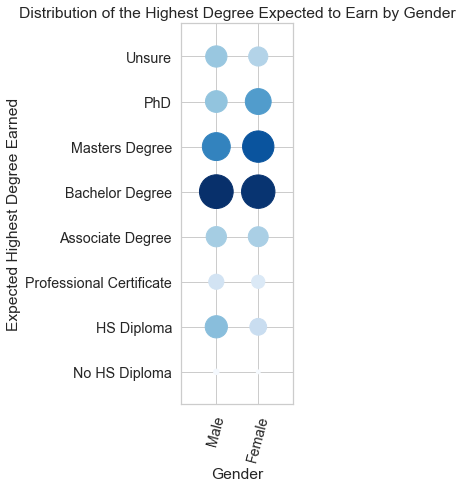

In [384]:
#group the expectations question by gender and create a dataframe
expectations = pd.DataFrame(data = df.groupby('X2SEX')['EXPECT'].value_counts(normalize = True)).unstack()
expectations.columns = ['No HS Diploma', 'HS Diploma', 'Professional Certificate', 'Associate Degree', 'Bachelor Degree', 'Masters Degree', 'PhD', 'Unsure']
expectations.index = ['Male', 'Female']
expectations

#change columns and index into arrays
degree,gender = np.meshgrid(expectations.columns, expectations.index)

#multiply df by a scalar to make graph circles visible
expectations *= 4000

#plot figure
plt.figure(figsize = (2, 7))
#assign axis, make color gradient and size based on values for percentage
plt.scatter(x=gender.flatten(), y=degree.flatten(), s=expectations.values.flatten(), c = expectations.values.flatten(),  cmap= 'Blues')
#set formatting and style
plt.title('Distribution of the Highest Degree Expected to Earn by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Highest Degree Earned')
plt.margins(0.5, 0.1)
plt.xticks(rotation=75)

#plt.savefig('img/gender-majors.png', bbox_inches='tight', transparent=True)

plt.show()

This chart shows that, overall, female students expect to obtain a higher degree than male students. A higher percentage of female students expect to earn a Master's degree or PhD, while a higher percentage of male students expect to earn a HS Diploma. This could be important for two reasons. First, a student might be less likely to pursue a STEM major if they do not expect to earn a college degree. Additionally, as most science careers require a college degree, students who do not expect to earn a college degree might not expect to have a STEM career. 

### Expectations by Race

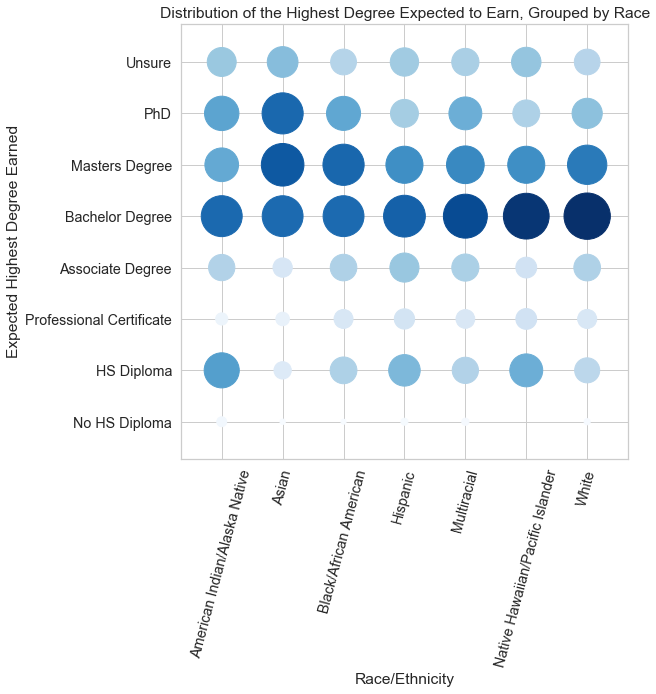

In [383]:
#create dataframe with expectations grouped by race
race_expectations = pd.DataFrame(data = df.groupby('X2RACE')['EXPECT'].value_counts(normalize = True)).unstack()
race_expectations.columns = ['No HS Diploma', 'HS Diploma', 'Professional Certificate', 'Associate Degree', 'Bachelor Degree', 'Masters Degree', 'PhD', 'Unsure']
race_expectations.index = ['American Indian/Alaska Native', 'Asian', 'Black/African American', 'Hispanic', 'Multiracial', 'Native Hawaiian/Pacific Islander', 'White']

#create array of columns and index
degree_race,race = np.meshgrid(race_expectations.columns, race_expectations.index)

#scale dataframe so that circles appear on graph
race_expectations *= 7000

#plot the data
plt.figure(figsize = (8, 8))
#assign values to each axis with the values determining the size and gradient of the circles
plt.scatter(x=race.flatten(), y=degree_race.flatten(), s=race_expectations.values.flatten(), c = race_expectations.values.flatten(),  cmap= 'Blues')
#style the graph
plt.xticks(rotation=75)
plt.title('Distribution of the Highest Degree Expected to Earn, Grouped by Race')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Expected Highest Degree Earned')
plt.margins(0.1, 0.1)

#plt.savefig('img/race-degree.png', bbox_inches='tight', transparent=True)

plt.show()

This graph shows that the highest percentage of White students expect to each a Bachelor's degree as their highest degree, with few not expecting to earn at least a Bachelor's degree. Similarly, Asian students had the highest percentage that expected to earn above a Bachelor's degree and few expecting to earn less than a Bachelor's degree. American Indian/Alaska Native, Hispanic, Native Hawaiian/Pacific Islander students had the highest percentages that expected to earn a HS Diploma as their highest degree. As with above, students who do not expect to earn a college degree might be less likely to later pursue a STEM degree.

## Students Who Expect to Have STEM Career vs Majoring in STEM

Another aspect of the students' expectations is if they expect to have a career in STEM at age 30. This can be compared with the students who end up pursuing a STEM major.

''

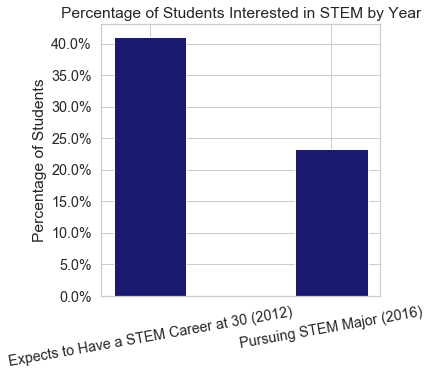

In [381]:
#create dataframes for each group
stem_career = pd.DataFrame(data = modeling_df.X2STU30OCC_STEM1.value_counts(normalize = True).values, index = modeling_df.X2STU30OCC_STEM1.value_counts(normalize = True).index, columns = ["2009"])
stem_major = pd.DataFrame(data = modeling_df.target.value_counts(normalize = True).values, index = modeling_df.target.value_counts(normalize = True).index, columns= ['2016'])

#put dataframes together and isolate the positive values for each
difference_in_expectations = pd.concat([stem_career, stem_major], axis = 1).T
yes_STEM = difference_in_expectations[1].values

#plot the data
fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(['Expects to Have a STEM Career at 30 (2012)', 'Pursuing STEM Major (2016)'], yes_STEM, width = 0.4, color = 'midnightblue')
ax.set_ylabel('Percentage of Students')
ax.set_title('Percentage of Students Interested in STEM by Year')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.xticks(rotation=10)

#plt.savefig('img/stem-interest.png', bbox_inches='tight', transparent=True)

;

This shows that many more students expect to have a STEM career at 30 than end up pursuing a STEM major four years later, at 41% and 23%, respectively. There are many factors that can cause a student to change their career aspirations over time. While some of this is inenvitable, it would be worth further analyzing when these changes occur and the motivating factor for it. Additionally, it further stresses the importance of engaging more students before college, as there will be students who change from STEM to non-STEM during college.  

## Gender Distribution of STEM vs non STEM

The next step was to look at the distributions of gender and races for STEM majors and all majors to look for groups that might be underrepresented. Engaging underrepresented groups would open STEM to more people and would increase diversity within STEM fields.

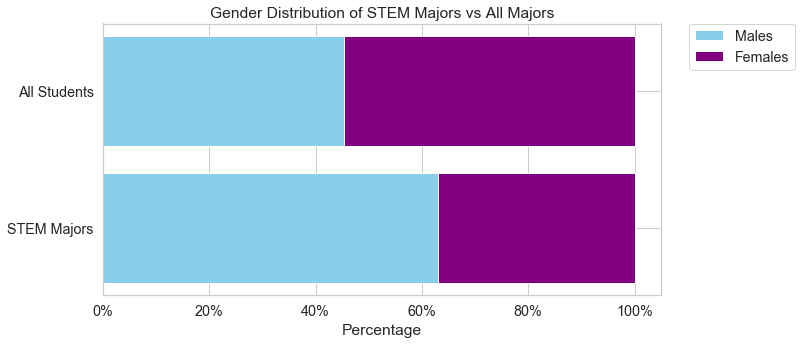

In [393]:
#create dataframe of groupby objects (distribution of majors vs overall)
target_gender = pd.DataFrame(modeling_df.groupby(by = ['target'])['X2SEX'].value_counts(normalize = True))
gender = pd.DataFrame(data = modeling_df.X2SEX.value_counts(normalize = True), columns = ['X2SEX'])

#change name of column to value to not confused with target variable
target_gender.rename(columns = {'X2SEX':'value'}, inplace = True)

#change multindex to individual columns
target_gender.reset_index(inplace=True, level = ('target', 'X2SEX'))

#isolate only students choosing a stem major
target_gender = target_gender[target_gender['target'] != 0]

#reset overall distribution df index and change column titles to align with other df
gender.reset_index(inplace=True)
gender.rename(columns = {'X2SEX':'value', 'index' : 'X2SEX'}, inplace = True)

#append overall distribution to target distribution
target_gender = target_gender.append(gender, sort = True)

#change 1/2 to male/female labels
target_gender['X2SEX'] = target_gender['X2SEX'].map({1: 'Male', 2: 'Female'})

#create x-values for barchart
males = target_gender[target_gender['X2SEX'] == 'Male']['value'].values
females = target_gender[target_gender['X2SEX'] == 'Female']['value'].values

#create visual
label = ['STEM Majors', 'All Students']
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.barh(label, males, align='center', color='skyblue',label='Males')
ax.barh(label, females, align='center', left=males, color='purple',label='Females')
ax.set_yticks(label)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
ax.set_xlabel('Percentage')
ax.set_title('Gender Distribution of STEM Majors vs All Majors')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.savefig('img/gender-majors.png', bbox_inches='tight', transparent=True)


This chart shows that females are signficantly underrepresented as STEM majors. Female students made up 55% of the target dataset (all majors), but only 37% of STEM majors.

''

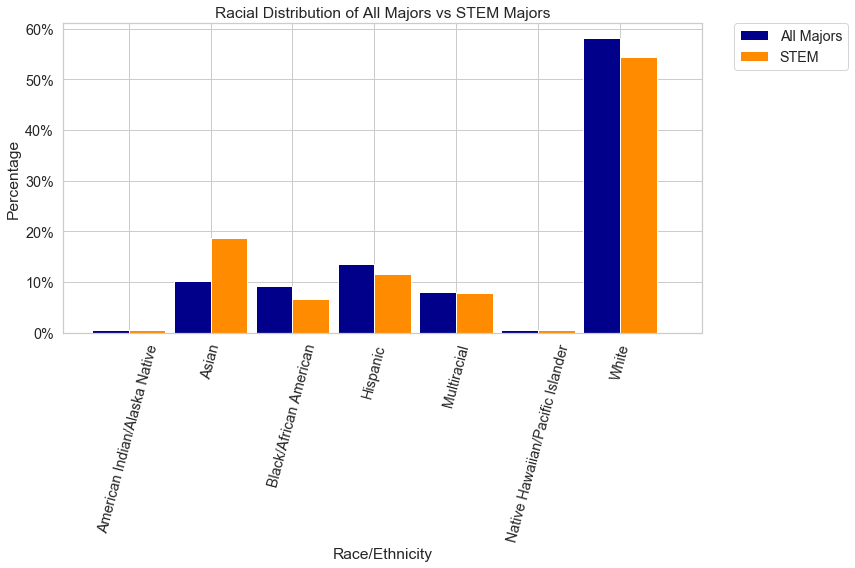

In [365]:
#create dataframe of race distribution for all majors and for STEM majors
race_df = pd.DataFrame(data = modeling_df.X2RACE.value_counts(normalize = True))
race_df.rename(columns = {'X2RACE': 'Overall'}, inplace= True)
stem_race_df = pd.DataFrame(data = modeling_df[modeling_df['target'] ==1].X2RACE.value_counts(normalize = True))
stem_race_df.rename(columns = {'X2RACE': 'STEM'}, inplace= True)
race_dist = pd.concat([race_df, stem_race_df], axis = 1)

x = np.arange(len(race_dist))
width = 0.45

#plot all majors and STEM majors side-by-side
fig, ax = plt.subplots(figsize= (12, 8))
ax.bar(x - width/2, race_dist['Overall'], width, 
                label='All Majors', color = 'darkblue')
ax.bar(x + width/2, race_dist['STEM'], width, 
                label='STEM', color = 'darkorange')
#format graph
ax.set_ylabel('Percentage')
ax.set_xlabel('Race/Ethnicity')
ax.set_title('Racial Distribution of All Majors vs STEM Majors')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.xticks(ticks = range(0,8), rotation = 75, labels = ['American Indian/Alaska Native', 'Asian', 'Black/African American', 
                                                        'Hispanic', 'Multiracial', 'Native Hawaiian/Pacific Islander', 'White'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

#plt.savefig('img/race-majors.png', bbox_inches='tight', transparent=True)

;

The above graph shows that Black/African American, Hispanic, and White students are all underrepresented within STEM, while Asian students make up a larger percentage of STEM majors than in the overall distribution. It would be worth further breaking this down by gender to see how much of the underrepresentation comes from the underrepresentation of women. Overall, though, Black/African students have the most significant underrepresentation within the STEM majors, with their representation being about 1/3 of what it is among all majors.

## Students Who See Themselves as Science People

Students were asked if they see themselves as a "science person". One hypothesis is that a student who sees themselves as a science person would be more likely to continue to pursue STEM. 

''

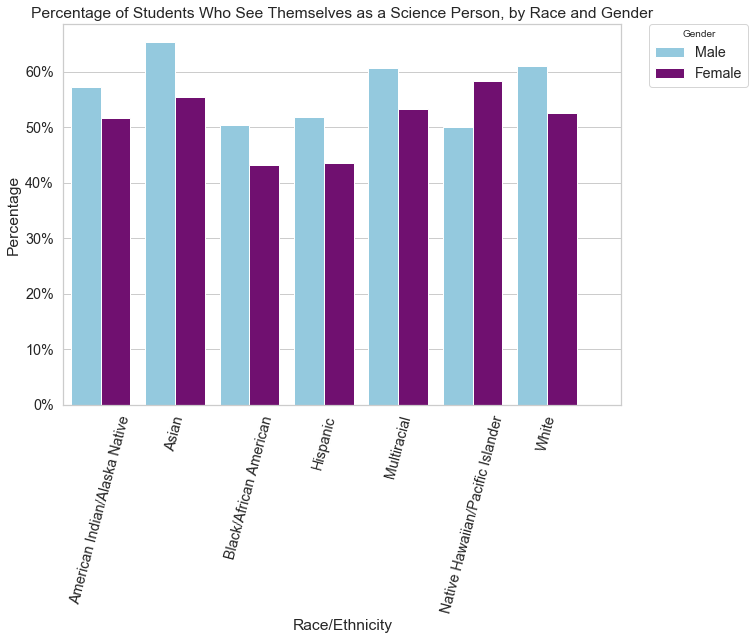

In [392]:
#create dataframe of groupby object
person_demo = pd.DataFrame(modeling_df.groupby(by = ['X2RACE','X2SEX'])['S2SPERSON1'].value_counts(normalize = True))
#change name of column to value to not confused with target variable
person_demo.rename(columns = {'S2SPERSON1':'value'}, inplace = True)
#change multindex to individual columns
person_demo.reset_index(inplace=True, level = ('X2RACE', 'X2SEX', 'S2SPERSON1'))
#change 1/2 to male/female labels
person_demo['X2SEX'] = person_demo['X2SEX'].map({1: 'Male', 2: 'Female'})
#isolate only students choosing a stem major
person_demo = person_demo[person_demo['S2SPERSON1'] != 0]


plt.figure(figsize = (10, 7))
sns.barplot(x = 'X2RACE', y = 'value', hue = 'X2SEX', data = person_demo, palette = {'Male':'skyblue', 'Female':'purple'})
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage') 
plt.title('Percentage of Students Who See Themselves as a Science Person, by Race and Gender')
plt.xticks(ticks = range(0,8), rotation = 75, labels = ['American Indian/Alaska Native', 'Asian', 'Black/African American', 'Hispanic', 'Multiracial', 'Native Hawaiian/Pacific Islander', 'White'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.legend(title = 'Gender', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.savefig('img/sees-as-science.png', bbox_inches='tight', transparent=True)

;


This chart shows the percentage of each gender and race that see themselves as a science person. Overall, a higher percentage of male students saw themselves as science people (with Native Hawaiian/Pacific Islander students as the exception). Black/African American female students and Hispanic female students had the lowest percentage who saw themselves as science people at 43% and 44%, respectively. Asian male students, Multiracial male students, and White male students had the highest percentages at 65%, 61%, and 61%, respectively.

There are many reasons a student could see themselves as a science person. They could be taking many science classes, they could be earning high grades or test scores, they could be earning awards. This could also be influenced by the examples of "science people" they see. Students who see science people who look like them more frequently may be better able to see themselves as science people. There are many reasons a student could see themselves as a science person. They could be taking many science classes, they could be earning high grades or test scores, they could be earning awards. This could also be influenced by the examples of "science people" they see. Students who see science people who look like them more frequently may be better able to see themselves as science people. 

***

## Modeling <a id="Modeling"></a>
##### [(back to top)](#Overview)

This project is focused on creating a highly interpretable model to understand how each feature impacts whether or not a student selects a STEM major. Therefore, I focused on a Logistic Regression and Decision Tree. 

The first step was to split out the target variable from the dataframe and create the list of features that will be put into the model, eliminating the columns that had been turned into dummy variables (but were left in for visualization purposes). Then, I split the data into training and test sets.

For this project, I will be trying to maximize the F1 score, as there is a class imbalance between STEM majors and non-STEM majors.

In [10]:
features = ['S2SCLUB', 'S2SCOMPETE', 'S2SSUMMERPRG', 'S2SGROUP', 'S2STUTORED', 'S2SPERSON1', 'S2SPERSON2', 
               'S2SLEARN', 'S2SBORN', 'S2SUSELIFE', 'S2SUSECLG', 'S2SUSEJOB', 'S2SENJOYING', 'S2SWASTE', 'S2SBORING', 
               'S2STESTS', 'S2STEXTBOOK', 'S2SSKILLS', 'S2STCHTREAT', 'S2STCHINTRST', 
               'S2STCHEASY', 'S2STCHTHINK', 'S2STCHGIVEUP',
               'S2SASSEXCL', 'S2SENJOYS', 'S2SCHALLENGE', 'S2SHSREQ', 'S2SCLGADM', 
               'S2SCLGSUCC', 'S2SCAREER', 'S2SCNSLREC', 'S2STCHRREC', 'S2SPARREC', 'S2SFAMREC', 
               'S2SEMPREC', 'S2SFRIEND', 'S2SDOWELL', 'S2SASSIGNED', 'X2STU30OCC_STEM1', 'took_science_2012', 'bio', 'chem', 'enviro', 'physics', 'engineering', 'compsci', 'misc_class',
               'female', 'public', 'black', 'hispanic', 'asian', 'ai_an', 'multiple_race', 'nh_pi' , 'X2POVERTY185', 'underrep']

X = modeling_df.drop(columns = 'target', axis =1)
X = X[features]
y = modeling_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Decision Tree - Initial

I first tried a simple Decision Tree model.

In [263]:
#instantiate the classifier
dtc = DecisionTreeClassifier(random_state = 20)

#fit the classifier
dtc.fit(X_train, y_train)

#make predictions 
y_pred_dtc_train = dtc.predict(X_train)
y_pred_dtc_test = dtc.predict(X_test)

In [416]:
metric_dict = {}
metric_dict['Initial_DecisionTree'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_dtc_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, y_pred_dtc_test),
                                  'train_precision':metrics.precision_score(y_train, y_pred_dtc_train),
                                  'test_precision':metrics.precision_score(y_test, y_pred_dtc_test),
                                  'train_recall':metrics.recall_score(y_train, y_pred_dtc_train),
                                  'test_recall':metrics.recall_score(y_test, y_pred_dtc_test),
                                  'train_f1':metrics.f1_score(y_train, y_pred_dtc_train),
                                  'test_f1':metrics.f1_score(y_test, y_pred_dtc_test)
                                      }

In [417]:
metric_dict['Initial_DecisionTree']

{'train_accuracy': 0.9945324068800547,
 'test_accuracy': 0.6933940774487471,
 'train_precision': 0.99899849774662,
 'test_precision': 0.3547794117647059,
 'train_recall': 0.9774620284174425,
 'test_recall': 0.37475728155339805,
 'train_f1': 0.9881129271916791,
 'test_f1': 0.36449480642115195}

This model is very overfit, as seen by the fact the train metrics are significantly higher than the test metrics. The F1 score is still very low, as are all other train metrics. 
***

### Decision Tree - Grid Search

In order to try to address the overfitting and to improve the metrics, I used gridsearch to find the best hyperparameter values. The max depth determines how many levels the decision tree will have, which can help with overfitting.

In [11]:
#instantiate classifier
dtc_gs = DecisionTreeClassifier(random_state = 20)

#create parameters for the gridsearch to search through
param_dict={'max_depth': range(3,15),
            'criterion': ['gini', 'entropy'],
            'splitter': ['random', 'best'],
            'max_features': ['auto', 'sqrt', 'log2']}

#create the gridsearch decision tree and fit it to the data to determine which will produce the best f1 score
grid_tree=GridSearchCV(dtc_gs, 
                       param_dict, 
                       cv=10, 
                       scoring='f1', 
                       verbose=1, 
                       n_jobs=-1)

grid_tree.fit(X_train,y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   25.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=1)

In [267]:
#find the best hyperparameter values
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2', random_state=20,
                       splitter='random')

In [268]:
#fit the best decision tree to the test and train data to get the metrics
pred_dtcgs_test = grid_tree.best_estimator_.predict(X_test)
pred_dtcgs_train = grid_tree.best_estimator_.predict(X_train)

In [418]:
metric_dict['GridSearch_DecisionTree'] = {'train_accuracy': metrics.accuracy_score(y_train, pred_dtcgs_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, pred_dtcgs_test),
                                  'train_precision':metrics.precision_score(y_train, pred_dtcgs_train),
                                  'test_precision':metrics.precision_score(y_test, pred_dtcgs_test),
                                  'train_recall':metrics.recall_score(y_train, pred_dtcgs_train),
                                  'test_recall':metrics.recall_score(y_test, pred_dtcgs_test),
                                  'train_f1':metrics.f1_score(y_train, pred_dtcgs_train),
                                  'test_f1':metrics.f1_score(y_test, pred_dtcgs_test)}
metric_dict['GridSearch_DecisionTree']

{'train_accuracy': 0.7793598359722064,
 'test_accuracy': 0.785876993166287,
 'train_precision': 0.5526315789473685,
 'test_precision': 0.5889328063241107,
 'train_recall': 0.267515923566879,
 'test_recall': 0.28932038834951457,
 'train_f1': 0.3605150214592275,
 'test_f1': 0.38802083333333337}

The GridSearch signficantly reduced the overfitting; however, the model is now underfit and has very low F1, recall, and precision scores. The next step for Decision Tree would be to try RandomForest of XGBoost; however, this project is reliant on an interpretable model, which is lost with those models. Therefore, I will explore Logistic Regression next. 
***

### Logistic Regression - Initial

To get a baseline, I ran a Logistic Regression with the default parameters. I increased the `max_iter`, though, to address an issue of the model failing to converge. 

In [270]:
#instantiate model
lr_initial = LogisticRegression(max_iter = 10000, random_state = 20)

#fit the model to the training set
lr_initial.fit(X_train, y_train)

#generate predictions on the train and test sets
initial_train_pred = lr_initial.predict(X_train)
initial_test_pred = lr_initial.predict(X_test)

In [419]:
metric_dict['Initial_LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train, initial_train_pred),
                                      'test_accuracy': metrics.accuracy_score(y_test, initial_test_pred),
                                      'train_precision':metrics.precision_score(y_train, initial_train_pred),
                                      'test_precision':metrics.precision_score(y_test, initial_test_pred),
                                      'train_recall':metrics.recall_score(y_train, initial_train_pred),
                                      'test_recall':metrics.recall_score(y_test, initial_test_pred),
                                      'train_f1':metrics.f1_score(y_train, initial_train_pred),
                                      'test_f1':metrics.f1_score(y_test, initial_test_pred) 
                                          }

metric_dict['Initial_LogisticRegression']

{'train_accuracy': 0.7954208907620458,
 'test_accuracy': 0.7972665148063781,
 'train_precision': 0.6344676180021954,
 'test_precision': 0.6605504587155964,
 'train_recall': 0.28319451249387556,
 'test_recall': 0.2796116504854369,
 'train_f1': 0.39159891598915986,
 'test_f1': 0.39290586630286495}


While the accuracy of this model is high, that is likely due to the class imbalance since the F1 score is quite low (0.39). The model does not have an issue with overfitting, but is likely underfit. 
***

### Logistic Regression - Grid Search

To address the underfitting and the low F1 score, I ran a GridSearch on the Logistic Regression model to determine the hyperparamter values that would maximize the F1 score. Because there is a class imbalance, I also wanted to address that within the model itself before trying sampling methods.

In [12]:
#instantiate classifier
clf = LogisticRegression()

#select hyperparameter values to test
param_grid = {
    
    'max_iter': [100, 250, 500, 1000, 5000, 10000],
    'C': [0.0001, 0.001, 0.01, 1, 100, 1000], 
    'class_weight': [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}]
}

#run gridsearch with hyperparamters
gs_LR = GridSearchCV(clf, param_grid, cv=5, scoring = 'f1', n_jobs = -1, verbose = 2)
#fit the model to the train set
gs_LR.fit(X_train, y_train)
#get the best parameters
gs_LR.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   43.0s finished


{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100}

In [22]:
#instantiate and run the model with those hyperparamters on the training set
gs_lr = LogisticRegression(C = 0.01, class_weight = 'balanced', max_iter = 100, random_state = 20)
gs_lr.fit(X_train, y_train)

#generate predicts using that model
gs_lr_train_pred = gs_lr.predict(X_train)
gs_lr_test_pred = gs_lr.predict(X_test)


In [25]:
metric_dict['GridSearch_LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train, gs_lr_train_pred),
                                      'test_accuracy': metrics.accuracy_score(y_test, gs_lr_test_pred),
                                      'train_precision':metrics.precision_score(y_train, gs_lr_train_pred),
                                      'test_precision':metrics.precision_score(y_test, gs_lr_test_pred),
                                      'train_recall':metrics.recall_score(y_train, gs_lr_train_pred),
                                      'test_recall':metrics.recall_score(y_test, gs_lr_test_pred),
                                      'train_f1':metrics.f1_score(y_train, gs_lr_train_pred),
                                      'test_f1':metrics.f1_score(y_test, gs_lr_test_pred) 
                                               }

metric_dict['GridSearch_LogisticRegression']

{'train_accuracy': 0.6968903064130311,
 'test_accuracy': 0.6956719817767654,
 'train_precision': 0.41208167895632447,
 'test_precision': 0.41031652989449,
 'train_recall': 0.7119059284664381,
 'test_recall': 0.6796116504854369,
 'train_f1': 0.5220046703790192,
 'test_f1': 0.5116959064327485}

Changing the hyperparameters that address the regularization (C), class weight, and number of iterations improved the model a decent amount. When trying to continue to decrease the number of iterations, the model was no longer able to converge, so it remained at 100. The F1 score went from about 0.39 to 0.52. The recall also improved. The accuracy decreased, but that is likely due to addressing the class imbalance. 

***

1    6831
0    1948
Name: S2SASSEXCL, dtype: int64

### Logistic Regression - Select K Best Feature Selection

Because there were many features, I wanted to determine if the model would be better fit by selecting only the most influential features. This could help with any overfitting that might occur. I used Select K Best to determine the 15 best columns and ran a Logisitic Regression using those features. 

In [275]:
#instantiate the kbest selector
selector = SelectKBest(f_regression, k = 15)
#fit the selector to the data
selector.fit(X_train, y_train)
#pull out the selected columns
selected_columns = X_train.columns[selector.get_support()]
selected_columns

Index(['S2SCLUB', 'S2SCOMPETE', 'S2SSUMMERPRG', 'S2SPERSON1', 'S2SPERSON2',
       'S2SUSEJOB', 'S2SENJOYING', 'S2SENJOYS', 'S2SCHALLENGE', 'S2SCAREER',
       'S2SDOWELL', 'X2STU30OCC_STEM1', 'female', 'asian', 'underrep'],
      dtype='object')

In [276]:
#run a logisitc regression grid search to determine the best hyperparamters for just those columns
lr_kbest = GridSearchCV(clf, param_grid, cv=5, scoring = 'f1', n_jobs = -1, verbose = 2)
lr_kbest.fit(X_train[selected_columns], y_train)

lr_kbest.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   23.0s finished


{'C': 100, 'class_weight': 'balanced', 'max_iter': 100}

In [277]:
#fit a logisitic regression on the selected columns using the gridsearch hyperparamters
LR_kbest = LogisticRegression(C=1, class_weight= 'balanced', max_iter = 100, random_state = 20)
LR_kbest.fit(X_train[selected_columns], y_train)

#create predictions on the train and test set
kbest_train_pred = LR_kbest.predict(X_train[selected_columns])
kbest_test_pred= LR_kbest.predict(X_test[selected_columns])

In [421]:
metric_dict['KBEST_LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train, kbest_train_pred),
                                      'test_accuracy': metrics.accuracy_score(y_test, kbest_test_pred),
                                      'train_precision':metrics.precision_score(y_train, kbest_train_pred),
                                      'test_precision':metrics.precision_score(y_test, kbest_test_pred),
                                      'train_recall':metrics.recall_score(y_train, kbest_train_pred),
                                      'test_recall':metrics.recall_score(y_test, kbest_test_pred),
                                      'train_f1':metrics.f1_score(y_train, kbest_train_pred),
                                      'test_f1':metrics.f1_score(y_test, kbest_test_pred)
                                         }

metric_dict['KBEST_LogisticRegression']

{'train_accuracy': 0.6865246611231347,
 'test_accuracy': 0.6847380410022779,
 'train_precision': 0.4015508169482138,
 'test_precision': 0.3969732246798603,
 'train_recall': 0.7104360607545321,
 'test_recall': 0.6621359223300971,
 'train_f1': 0.5130927105449399,
 'test_f1': 0.4963609898107714}

Selecting only 15 columns did not have a significant impact on the performance of the model. The metrics decreased slightly.

***

### Logistic Regression - SMOTE

The final strategy was to try to address the class imbalance using SMOTE. This would oversample the minority class, which, in this case, is STEM majors.

In [279]:
#instantiate SMOTE and create new training sets with SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

#fit a logisitic regression on the new training sets using the hyperparamters from an earlier gridsearch
LR_smote = LogisticRegression(C = 1, max_iter = 250, random_state = 20)
LR_smote.fit(X_train_smote, y_train_smote)

#generate predictions using the model
smote_train_pred = LR_smote.predict(X_train_smote)
smote_test_pred = LR_smote.predict(X_test)

In [422]:
metric_dict['SMOTE_LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train_smote, smote_train_pred),
                                      'test_accuracy': metrics.accuracy_score(y_test, smote_test_pred),
                                      'train_precision':metrics.precision_score(y_train_smote, smote_train_pred),
                                      'test_precision':metrics.precision_score(y_test, smote_test_pred),
                                      'train_recall':metrics.recall_score(y_train_smote, smote_train_pred),
                                      'test_recall':metrics.recall_score(y_test, smote_test_pred),
                                      'train_f1':metrics.f1_score(y_train_smote, smote_train_pred),
                                      'test_f1':metrics.f1_score(y_test, smote_test_pred), 
                                          
                                          }
metric_dict['SMOTE_LogisticRegression']

{'train_accuracy': 0.7272187592757495,
 'test_accuracy': 0.6792710706150342,
 'train_precision': 0.7204146271235243,
 'test_precision': 0.3848964677222899,
 'train_recall': 0.742653606411398,
 'test_recall': 0.6135922330097088,
 'train_f1': 0.7313650979245834,
 'test_f1': 0.4730538922155689}

This model was very overfit and the metrics for the test set were slightly worse than the other Logisitc Regression models. Additionally, with SMOTE, the model becomes less interpretable because it oversamples certain data points. Because of this, it would not be a good fit for the final model. 

### Final Model Selection

The evaluation metrics from all models are summarized below. 

In [423]:
pd.DataFrame.from_dict(metric_dict, orient = 'index')

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Initial_DecisionTree,0.994532,0.693394,0.998998,0.354779,0.977462,0.374757,0.988113,0.364495
GridSearch_DecisionTree,0.779360,0.785877,0.552632,0.588933,0.267516,0.289320,0.360515,0.388021
Initial_LogisticRegression,0.795421,0.797267,0.634468,0.660550,0.283195,0.279612,0.391599,0.392906
GridSearch_LogisticRegression,0.696435,0.698861,0.411615,0.413507,0.711906,0.677670,0.521630,0.513613
KBEST_LogisticRegression,0.686525,0.684738,0.401551,0.396973,0.710436,0.662136,0.513093,0.496361
SMOTE_LogisticRegression,0.727219,0.679271,0.720415,0.384896,0.742654,0.613592,0.731365,0.473054


Looking at overall metrics, with preference given to the F1 score and a higher interpretability, the best model was the Logistic Regression with the hyperparamaters optimized using GridSearch. From this model, the follow coefficients were found:

In [282]:
coef_gs = dict(zip(list(features), list(gs_lr.coef_[0])))
sorted_dict = sorted(coef_gs.items(), key=lambda kv: kv[1])
sorted_dict.reverse()
coef_df = pd.DataFrame(data = sorted_dict, columns = ['feature', 'coefficient_value'])
coef_df

,feature,coefficient_value
0,asian,0.594530
1,X2STU30OCC_STEM1,0.491174
2,S2SPERSON1,0.330465
3,compsci,0.309787
4,S2SPERSON2,0.284498
5,S2SUSEJOB,0.278348
6,S2SSUMMERPRG,0.278012
7,S2SCAREER,0.271197
8,engineering,0.255788
9,S2SCLUB,0.207813


The odds derived from these coefficients can be found below. The coefficients are the log-odds of that feature. By doing the inverse operation, I got the odds ratio. This is the probability of the postive class over the odds of the negative class, or of being a STEM major over being a non-STEM major. Some factors made a student *less* likely to be in the positive class, or more likely to be the negative class. This is shown below in red. The odds ratio in the case of `female` and `underrepresented group` show the odds of being a non-STEM major over the odds of being a STEM major.

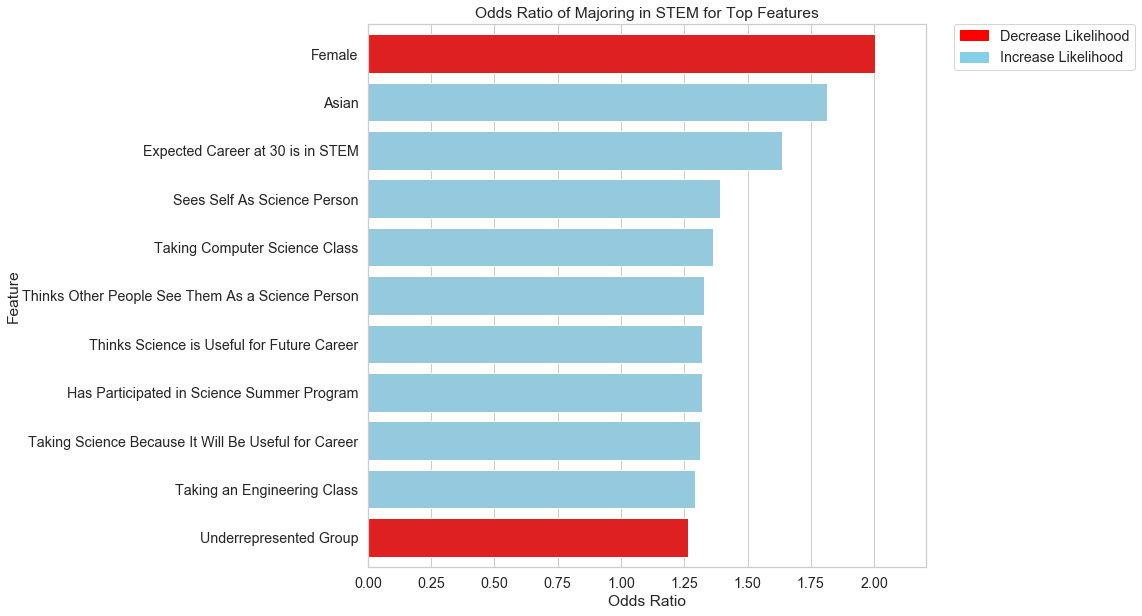

In [410]:
coef_df['pos_odd'] = e**coef_df['coefficient_value']
coef_df['neg_odd'] = 1/coef_df['pos_odd']
coef_df['highest_odd'] = np.where(coef_df['pos_odd'] > coef_df['neg_odd'], coef_df['pos_odd'], coef_df['neg_odd'])
coef_df.sort_values(by = 'highest_odd', ascending = False, inplace = True)
top_ten = coef_df[:11]


plt.figure(figsize = (10,10))
clrs = ['red' if x == 'female' else 'red' if x == 'underrep' else 'red' if x== 'misc_class' else 'skyblue' for x in top_ten['feature']]
ax = sns.barplot(x ='highest_odd', y = 'feature', data = top_ten, palette = clrs, orient = 'horiz')
plt.yticks(ticks = range(0,11), labels = ['Female', 'Asian', 'Expected Career at 30 is in STEM', 'Sees Self As Science Person', 
          'Taking Computer Science Class', 'Thinks Other People See Them As a Science Person', 
          'Thinks Science is Useful for Future Career', 'Has Participated in Science Summer Program', 
          'Taking Science Because It Will Be Useful for Career', 'Taking an Engineering Class', 'Underrepresented Group'])
plt.margins(0.1, 0.02)
ax.set_ylabel('Feature', labelpad = 0.5)
ax.set_xlabel('Odds Ratio')
ax.set_title('Odds Ratio of Majoring in STEM for Top Features')
legend = [Patch(facecolor='red', edgecolor='red', label='Decrease Likelihood'), Patch(facecolor='skyblue', edgecolor='skyblue', label='Increase Likelihood')]
ax.legend(handles = legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.savefig('img/feature-odds.png', bbox_inches='tight', transparent=True)

;

plt.show()

The factor that had the largest impact on whether or not a student went into STEM is their gender. A female student is half as likely to pursue a STEM major as a male student, or twice as likely to pursue a non-STEM major. Additionally, an Asian student is 75% times more likely to go into STEM as a White student. Lastly, underrepresented groups in STEM (female, Black, Hispanic, Alaska Native, and Native American students) are 25% less likely to go into STEM than White or Asian male students. This model shows that a student's self-concept in science and science identity, which is their own perception of if they are a science person and if others see them as a science person, are two of the top influences. 

As this data comes from an 11th grade student, a student's expected career weighs heavily, as well. High school students who expected to have a STEM career at 30 were more likely to be majoring in STEM in college. Similarly, students who were taking a science class because they knew it would be useful for a future career or thought science was useful for careers were 20% more likely to later enroll in a STEM major. Each of these show that many students have made decisions about their college interests and careers by the time they are in 11th grade. 

Lastly, students taking engineering and computer science classes in 11th grade were more likely enroll in a STEM major than other science classes, or not taking a science class. Engineering and computer science are not often included in graduation requirements, so it's possible that students who are taking these classes have already fulfilled the science requirements, thereby showing their interest in science. Students seeking out electives are likely going to be more interested in continuing their studies in the future. Another possibility is that those two science classes are closely tied to specific careers that are well known to be in high demand (and were in 2013, as well). Students who take those classes may be taking those classes because they want to be engineers or computer scientists. 

## Evaluation <a id="Evaluation"></a>
##### [(back to top)](#Overview)



This project used F1 score as it's main evaluation metric because of the class imbalance and because neither false negatives nor false positives were more detrimental. The score was 0.52, which is better random guessing, but not a highly accurate model for prediction. The cross-validation F1 scores are shown below, which average to an F1 score of 0.515. 

In [330]:
cross_val_score(estimator=gs_lr, X=X_test, y=y_test, cv = 5, scoring = 'f1')

array([0.53479853, 0.53731343, 0.48442907, 0.51048951, 0.50574713])

In [412]:
cross_val_score(estimator=gs_lr, X=X_test, y=y_test, cv = 5, scoring = 'f1').mean()

0.5145555340609185

#### Confusion Matrix

''

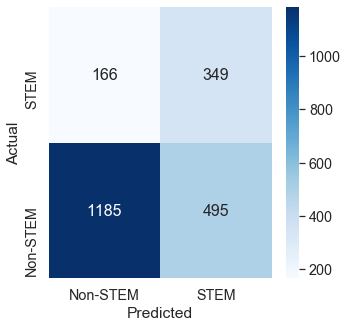

In [394]:
#create confusion matricx
LR_confusion = metrics.confusion_matrix(y_test, gs_lr_test_pred)
df_cm = pd.DataFrame(LR_confusion,columns=['Non-STEM','STEM'],index=['Non-STEM','STEM'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

#visualize confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(df_cm,cmap='Blues',annot=True,annot_kws={'size':16},fmt='g');
ax.set_ylim([0,2])
#plt.savefig('img/confusion-matrix.png', bbox_inches='tight', transparent=True)
;

The above confusion matrix further highlights that the model needs additional information about what factors impact a student becoming a STEM major, as it incorrectly assigned 495 students to be STEM majors that were not. As expected, more factors influence a student's decision to pursue a STEM major than are contained within this dataset.  

#### ROC CURVE

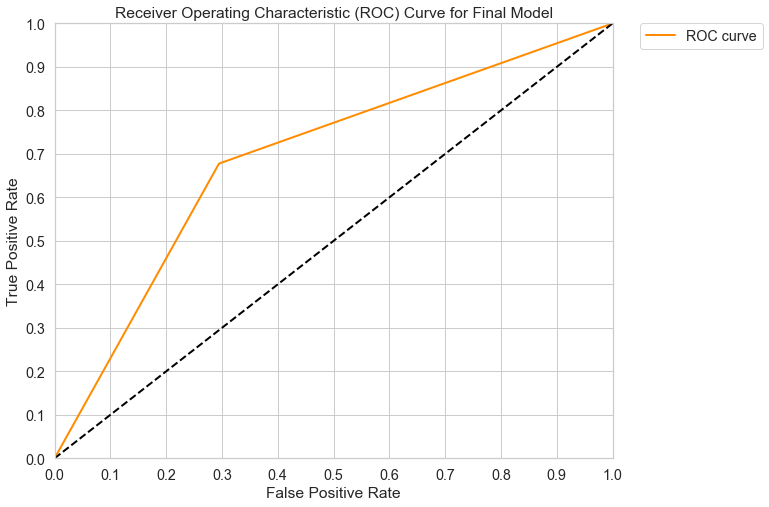

Test AUC: 0.6915135228848821


In [328]:
test_fpr, test_tpr, thresholds = roc_curve(y_test, gs_lr_test_pred)
test_auc = metrics.roc_auc_score(y_test, gs_lr_test_pred)


# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print('Test AUC:', auc)


The area under the curve score (AUC) is 0.69. This shows that the model is better than random guessing, shown as the dotted line that has an AUC score of 0.5. However, with more data and further analysis, there is room for improvement.


## Conclusion and Next Steps <a id="Conclusion"></a>
##### [(back to top)](#Overview)

This project aimed to determine the aspects of a student's high school experience that may be the most influential in their pursuit of a STEM degree in college. This project specifically focused on academic decisions and their attitudes towards science and science classes, along with their race and gender. The results from the final model were clear. 

By 11th grade, students have already put significant thought into their future career and their own self-concept in science. Students who are taking elective science classes that closely aligned with a career path (engineering and computer science) have an increased chance of going into a STEM major. Students who expect to have a STEM career at 30 or who think science will be useful for their future career are also more likely to go into a STEM major than those who do not. **It is important to fund more elective science classes, such as engineering and computer science, to open up more of the STEM world to students and to, hopefully, give them a concrete understanding about what they can do with STEM as a career.** Knowing it's importance and how it will fit into their future career trajectory can keep students engaged in STEM. 

Another key takeaway is the importance of career alignment for engaging students. Students who see this as a future career will be more likely to major in a STEM field, so **investing in career awareness and giving students a clear vision of what a STEM career looks like is beneficial.**

Finally, it is important to highlight the impact that being female has on the odds that a student pursues a STEM major, along with the impact of them seeing themselves as a science person and believing others see them as a science person. As a next step, I would like to continue this analysis for the female students to better understand how to engage more female students in STEM. Women being underrepresented in STEM can have an impact on whether or not a female student sees herself as a science person or thinks that other people see her as a science person. The visuals we consume on a daily basis, whether in media, the news, or in school, can influence how we see ourselves in the world and this is a reminder of the importance of highlighting all genders and races/ethnicities in the STEM field. **Investing in programs that bring in a diverse group of STEM professionals to talk with students could help students see themselves as science people more, as well as learn more about careers. Mentorship programs with STEM professionals for underrepresented groups could also be beneficial.**

#### Next Steps
A few next steps would be break the analysis into specific underrepresented groups, such as female students or Black or Hispanic students, to create more targeted recommendations. From this model, it is also clear that a lot more information goes into a student's decision to study STEM. Pulling in more demographic, family, and socioeconomic information could create a fuller picture of a student's decision. It would also be beneficial to continue this analysis with the baseline survey from their freshman year to understand how attitudes might be changing over the course of their high school career. From a broader standpoint, doing a longer-term longitudinal study would be incredibly useful to get a sense of when STEM interest is piqued and how it may wane over the years. 

